# Advanced Non-Linear Energy Optimization Problem
This notebook addresses a highly sophisticated energy optimization problem by incorporating complex, non-linear objective functions and constraints. We aim to:
- Minimize operational energy costs.
- Ensure comfort and efficiency constraints are met.
- Visualize results with advanced plots for deeper insights.

## Problem Formulation
### Physical Explanation
In modern buildings, multiple devices (e.g., HVAC systems, lighting, and appliances) consume energy to maintain desired conditions. Energy costs are often non-linear, reflecting diminishing returns or penalties for excessive use. Additionally:
- Comfort constraints ensure occupants experience desired environmental conditions.
- Energy efficiency constraints limit total consumption to promote sustainability.

### Variables
- $x_i$: Energy consumption of device $i$, measured in energy units.

### Objective Function
Minimize a non-linear cost function reflecting increasing operational costs:
$$
f(x) = \sum_{i=1}^n C_i \cdot x_i^2 + P \cdot \max(0, \sum_{i=1}^n x_i - E_{\text{threshold}})^2
$$
- $C_i$: Quadratic cost coefficient for device $i$.
- $P$: Penalty for exceeding energy usage threshold $E_{\text{threshold}}$.

### Constraints
1. **Comfort Constraint**: Maintain room temperature within a comfort range:
$$
|T_{room} - T_{desired}| \leq \epsilon
$$
2. **Energy Efficiency Constraint**: Total energy must not exceed a maximum:
$$
\sum_{i=1}^n x_i^2 \leq E_{\text{max}}
$$
3. **Device Bounds**: Energy usage for each device is bounded:
$$
x_{i, \text{min}} \leq x_i \leq x_{i, \text{max}}
$$

## Objective Function Explanation 
This section clarifies the components of the objective function, ensuring both accuracy and readability.

### Quadratic Cost Term
- **Mathematical Representation**: $ \sum_{i=1}^n C_i \cdot x_i^2 $
- **Purpose**: Captures the operational cost of energy usage, modeled quadratically to reflect real-world inefficiencies.
- **Physical Meaning**:
  - $ C_i $: Represents the cost or inefficiency rate for device $ i $.
  - $ x_i $: Energy usage by device $ i $.
  - Higher $ x_i $ leads to exponentially higher costs.

### Penalty Term
- **Mathematical Representation**: $ P \cdot \max(0, \sum_{i=1}^n x_i - E_{\text{threshold}})^2 $
- **Purpose**: Penalizes energy usage exceeding $ E_{\text{threshold}} $, ensuring sustainable practices.
- **Physical Meaning**:
  - $ P $: Penalty severity coefficient.
  - $ E_{\text{threshold}} $: Threshold defining excessive usage.
  - $ \max(0, \cdot) $: Ensures penalties are applied only when thresholds are exceeded.
  - Squared term magnifies penalties for larger excesses.

### Combined Objective Function
$$
f(x) = \sum_{i=1}^n C_i \cdot x_i^2 + P \cdot \max(0, \sum_{i=1}^n x_i - E_{\text{threshold}})^2
$$
- Balances operational costs with sustainability goals.

### Insights
- Encourages efficient energy usage.
- Discourages overuse through penalties.

In [1]:

import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Data setup
# Define device parameters
C = np.array([0.12, 0.15, 0.20])  # Quadratic cost coefficients for devices
x_min = np.array([0, 0, 0])       # Minimum usage limits
x_max = np.array([10, 10, 5])     # Maximum usage limits

# Environment parameters
T_ambient = 10                    # Ambient temperature (in degrees Celsius)
T_desired = 22                    # Desired room temperature (in degrees Celsius)
epsilon = 2                       # Allowed deviation from T_desired
alpha = np.array([0.8, -1.2, 0.5])  # Contribution of each device to room temperature

# Additional parameters
E_max = 150                       # Maximum allowable energy (efficiency constraint)
P = 0.5                           # Penalty coefficient for exceeding energy threshold
E_threshold = 20                  # Energy threshold for penalty application


## Objective Function
The non-linear cost function is:
$$
f(x) = \sum_{i=1}^n C_i \cdot x_i^2 + P \cdot \max(0, \sum_{i=1}^n x_i - E_{\text{threshold}})^2
$$

In [2]:

# Non-linear objective function
def objective(x):
    energy_usage = np.sum(x)
    penalty = max(0, energy_usage - E_threshold)**2
    return np.sum(C * x**2) + P * penalty


## Constraints
1. **Comfort Constraint**:
$$
|T_{room} - T_{desired}| \leq \epsilon
$$
Substituting $T_{room}$:
$$
|T_{ambient} + \sum_{i=1}^n \alpha_i \cdot x_i - T_{desired}| \leq \epsilon
$$
2. **Energy Efficiency Constraint**:
$$
\sum_{i=1}^n x_i^2 \leq E_{\text{max}}
$$
3. **Device Bounds**:
$$
x_{i, \text{min}} \leq x_i \leq x_{i, \text{max}}
$$

In [3]:

# Constraint 1: Comfort level (|T_room - T_desired| <= epsilon)
def comfort_constraint(x):
    T_room = T_ambient + np.dot(alpha, x)
    return epsilon - abs(T_room - T_desired)

# Constraint 2: Energy efficiency (sum(x_i^2) <= E_max)
def energy_efficiency_constraint(x):
    return E_max - np.sum(x**2)

# Bounds for each variable
bounds = [(x_min[i], x_max[i]) for i in range(len(C))]

# Combine constraints
constraints = [{'type': 'ineq', 'fun': comfort_constraint},
               {'type': 'ineq', 'fun': energy_efficiency_constraint}]


## Solving the Optimization Problem
Using advanced solvers, we find the optimal energy usage that minimizes the non-linear cost function while satisfying all constraints.

In [4]:

# Initial guess for the variables
initial_guess = np.array([5, 5, 2])

# Solve the optimization problem
result = minimize(objective, initial_guess, bounds=bounds, constraints=constraints)

# Output the results
if result.success:
    print("Optimal energy usage (units):", result.x)
    print("Minimum cost:", result.fun)
else:
    print("Optimization failed:", result.message)


Optimal energy usage (units): [10.          0.          4.00000003]
Minimum cost: 15.200000040971428


## Results and Visualization
We visualize the optimization results using advanced 3D plots to show the solution space and the interaction between variables.

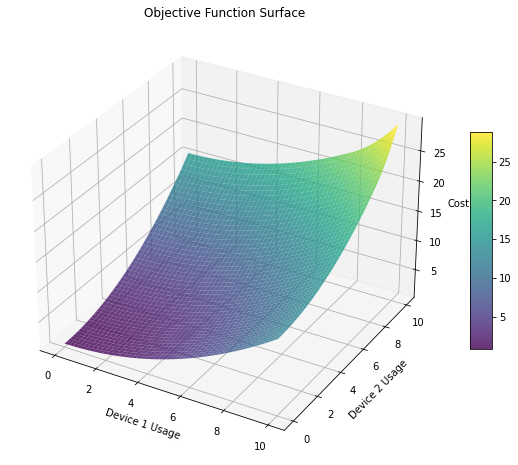

In [5]:

from mpl_toolkits.mplot3d import Axes3D

# Generate grid points
x = np.linspace(0, 10, 50)
y = np.linspace(0, 10, 50)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)

# Compute objective function values over the grid
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = objective(np.array([X[i, j], Y[i, j], 2]))  # Ensure inputs are numpy arrays

# Plot the surface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.set_title('Objective Function Surface')
ax.set_xlabel('Device 1 Usage')
ax.set_ylabel('Device 2 Usage')
ax.set_zlabel('Cost')
fig.colorbar(surface, shrink=0.5, aspect=10)
plt.show()


## Lagrange Multipliers
In this section, we compute the Lagrange multipliers associated with the problem's constraints:
- **Comfort Constraint**: Ensuring room temperature stays within the specified range.
- **Energy Efficiency Constraint**: Limiting the total energy usage.
The Lagrange multipliers represent how much the objective function would improve if the respective constraints were relaxed.

In [ ]:

from scipy.optimize import minimize

# Define the Lagrangian function
def lagrangian(x, lambda_1, lambda_2):
    T_room = T_ambient + np.dot(alpha, x)
    penalty = max(0, np.sum(x) - E_threshold)**2
    cost = np.sum(C * x**2) + P * penalty
    g1 = epsilon - abs(T_room - T_desired)  # Comfort constraint
    g2 = E_max - np.sum(x**2)  # Energy efficiency constraint
    return cost - lambda_1 * g1 - lambda_2 * g2

# Compute optimal device usage and Lagrange multipliers with improved initial guesses
def compute_optimal_lagrange():
    # New initial guess closer to the feasible region
    initial_guess = np.array([3, 2, 1, 0.5, 0.5])  # Device usage and multipliers
    bounds = [(0, 10), (0, 10), (0, 5), (None, None), (None, None)]

    # Constraints for feasibility
    constraints = [
        {'type': 'ineq', 'fun': lambda x: epsilon - abs(T_ambient + np.dot(alpha, x[:3]) - T_desired)},
        {'type': 'ineq', 'fun': lambda x: E_max - np.sum(x[:3]**2)}
    ]

    # Minimize the Lagrangian
    result = minimize(
        lambda x: lagrangian(x[:3], x[3], x[4]),
        initial_guess,
        bounds=bounds,
        constraints=constraints,
        options={"disp": True}  # Enable diagnostics
    )

    if result.success:
        optimal_device_usage = result.x[:3]
        optimal_lambdas = result.x[3:]
        return optimal_device_usage, optimal_lambdas
    else:
        print("Optimization diagnostics:", result.message)
        raise ValueError("Optimization failed. Constraints may still be too restrictive.")

# Get the results
try:
    optimal_device_usage, optimal_lambdas = compute_optimal_lagrange()
    print("Optimal Device Usage:", optimal_device_usage)
    print("Optimal Lagrange Multipliers (lambda_1, lambda_2):", optimal_lambdas)
except ValueError as e:
    print(e)


In [ ]:

# Visualize the effect of Lagrange multipliers
plt.figure(figsize=(8, 6))
plt.bar(["Lambda 1 (Comfort)", "Lambda 2 (Energy)"], optimal_lambdas, color=["blue", "green"])
plt.title("Lagrange Multipliers for Constraints")
plt.ylabel("Value")
plt.grid()
plt.show()
